<a href="https://colab.research.google.com/github/sanajana9050/Video-Game-Sales-Analysis/blob/main/Video_Game_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comprehensive Video Game Sales Trends Analysis Report**

##**Introduction**

##**Setup and Preliminary Data Cleaning**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/vgsales.csv')

# Handling missing values and converting data types
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)


##**Data Exploration**

In [ ]:
# Descriptive Statistics
print(df.describe())

# Unique values analysis
print(f"Unique Platforms: {df['Platform'].nunique()}")
print(f"Unique Genres: {df['Genre'].nunique()}")
print(f"Unique Publishers: {df['Publisher'].nunique()}")

# Sales distribution analysis
print(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe())


               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


##**Trend Analysis**


##**Global Sales Trends Over the Years**

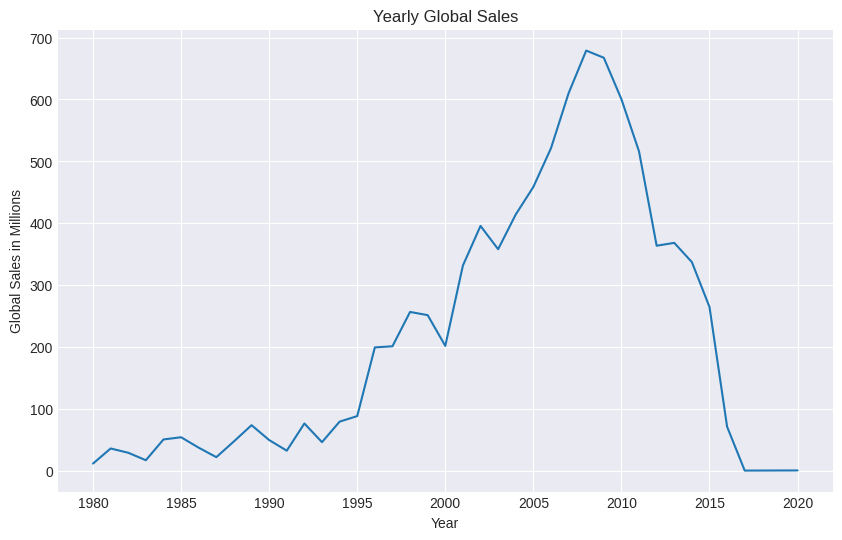

In [ ]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(10, 6))
yearly_sales.plot(title='Yearly Global Sales')
plt.ylabel('Global Sales in Millions')
plt.show()


##**Platform Sales Trends**

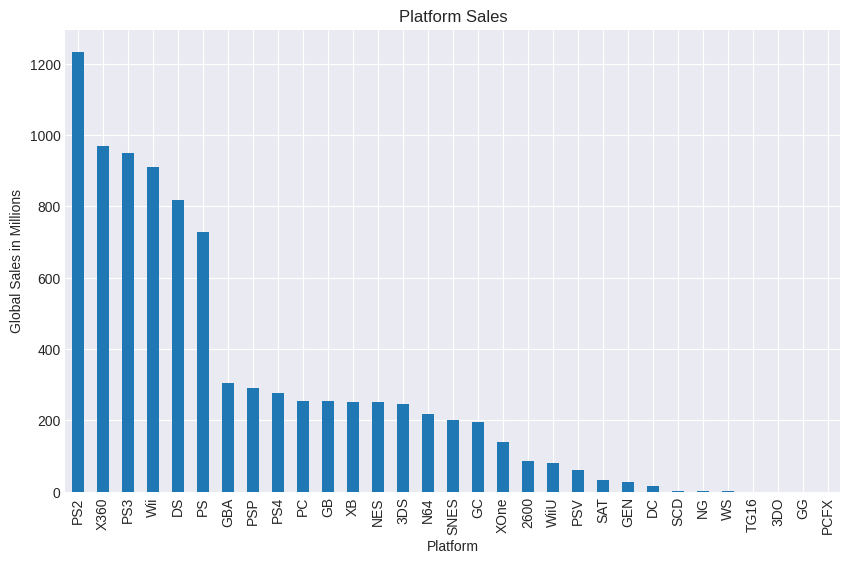

In [ ]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', title='Platform Sales')
plt.ylabel('Global Sales in Millions')
plt.show()


##**Genre Popularity Trends**

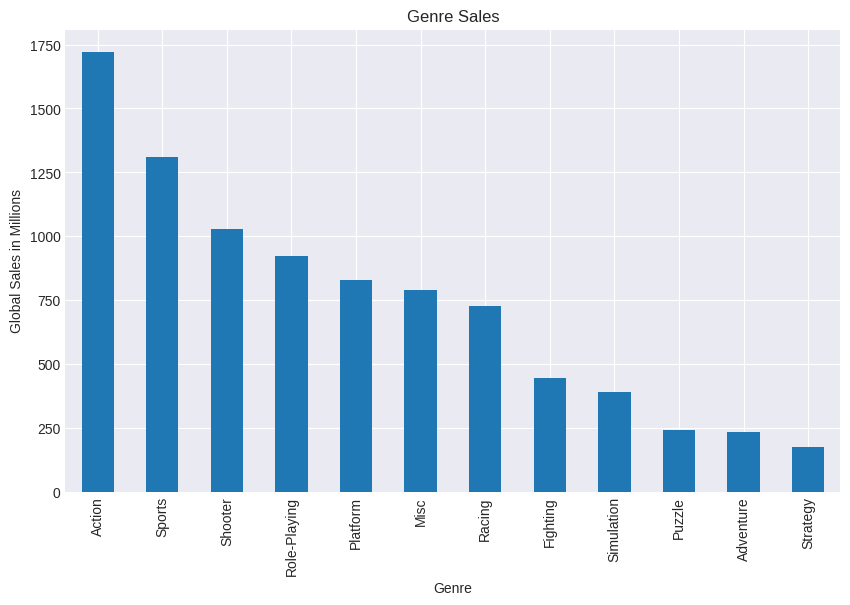

In [ ]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', title='Genre Sales')
plt.ylabel('Global Sales in Millions')
plt.show()


##**Publisher Sales Analysis**

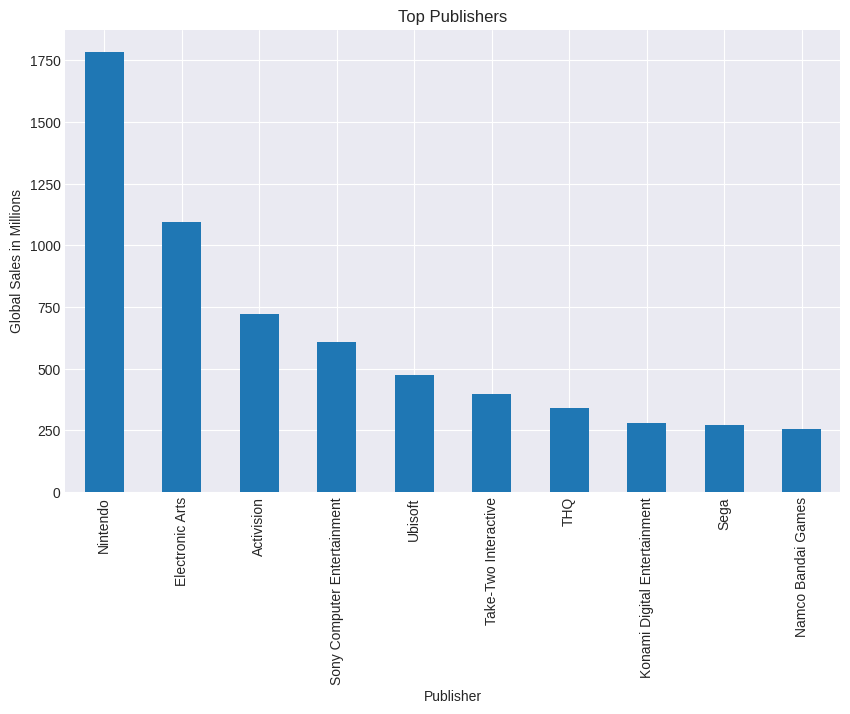

In [ ]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', title='Top Publishers')
plt.ylabel('Global Sales in Millions')
plt.show()


#**Comparative Analysis**

##**Regional Sales Comparison**

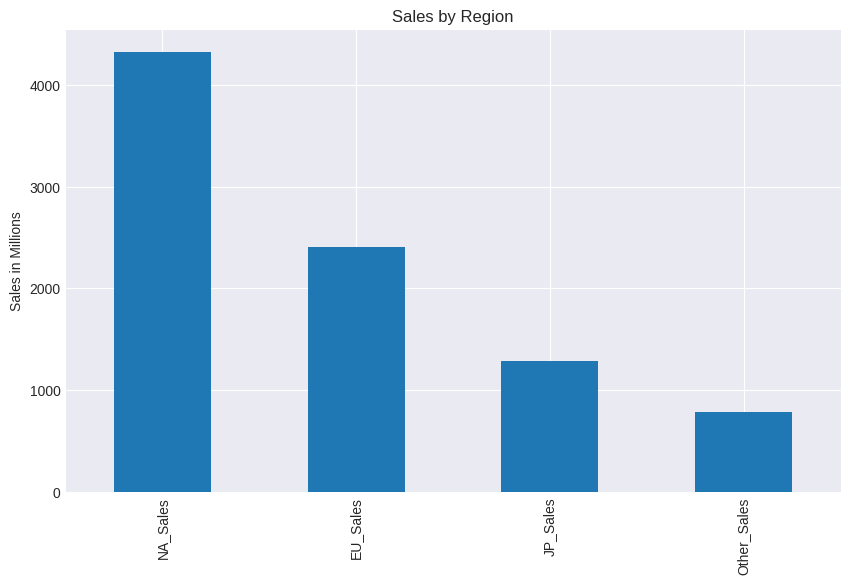

In [ ]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = df[regions].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Sales in Millions')
plt.show()


#**Video Game Sales Trends Analysis Report**

##**Introduction**

This report aims to uncover trends and insights from the video game sales dataset, which includes sales data across North America, Europe, Japan, and other regions. Through exploratory data analysis, trend analysis, and regression models, we aim to understand how video game sales are influenced by various factors such as platform, genre, and time.

##**Setup**

Importing the libraries and loading dataset



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Enhance default style of matplotlib plots
plt.style.use('seaborn-darkgrid')

# Load the dataset
df = pd.read_csv('/content/vgsales.csv')



<ipython-input-35-c9c9264700d7>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


##**Data Cleaning**

Cleaning the data to ensure integrity, like finding missing values, checking for duplicates.

In [ ]:
# Handling missing values
df.dropna(inplace=True)

# Convert data types
df['Year'] = df['Year'].astype(int)

# Checking for duplicates
df = df.drop_duplicates()

# Display the cleaned data
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##**Exploratory Data Analysis (EDA)**




In [ ]:
# Descriptive statistics
print(df.describe())

# Unique values in categorical columns
print(f"Unique Platforms: {df['Platform'].nunique()}")
print(f"Unique Genres: {df['Genre'].nunique()}")
print(f"Unique Publishers: {df['Publisher'].nunique()}")



               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


In [ ]:
# Load the dataset
df = pd.read_csv('/content/vgsales.csv')

# Dropping rows with missing 'Year' values as they are essential for our analysis
df = df.dropna(subset=['Year'])

# Converting 'Year' to integer
df['Year'] = df['Year'].astype(int)

# Aggregate sales by year
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()


##**Trend Analysis with Linear Regression**

###**Global Sales Trend Over Years**


In [ ]:
# Load the dataset
df = pd.read_csv('/content/vgsales.csv')

# Dropping rows with missing 'Year' values as they are essential for our analysis
df = df.dropna(subset=['Year'])

# Converting 'Year' to integer
df['Year'] = df['Year'].astype(int)

# Aggregate sales by year
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()


Mean Squared Error: 29185.16912407281
R^2 Score: 0.3357410831901374


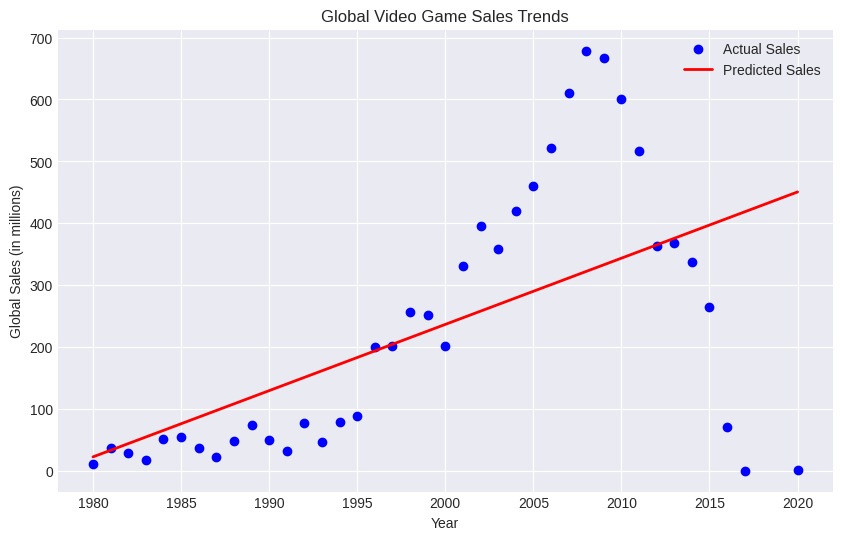

In [ ]:
# Reshaping the data
X = sales_by_year['Year'].values.reshape(-1, 1)
y = sales_by_year['Global_Sales'].values.reshape(-1, 1)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Making predictions
predictions = model.predict(X)

# Calculating the model's performance
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sales')
plt.plot(X, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Global Video Game Sales Trends')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.show()

